# Applying Logistic Regression Using Newton's method on our dataset

In [1]:
#importing all the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#loading our dataset 
breast_cancer = pd.read_csv('breast-cancer-wisconsin.csv')
breast_cancer.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
#displaying all columns
breast_cancer.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       ' Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses  ', 'Class'],
      dtype='object')

# Visualizing our Dataset to get better understanding 

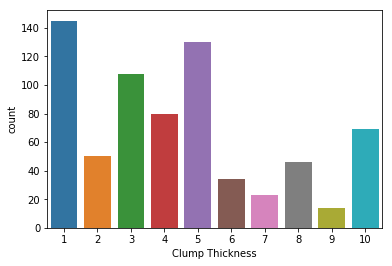

In [4]:
sns.countplot(x="Clump Thickness", data=breast_cancer)

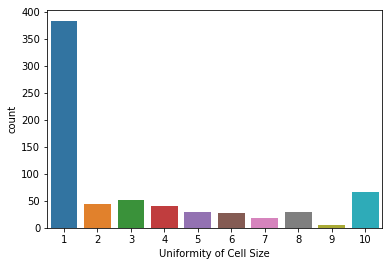

In [5]:
sns.countplot(x="Uniformity of Cell Size", data=breast_cancer)

'Where 2 meaning benign class cell and 4 meaning malignant class cell'

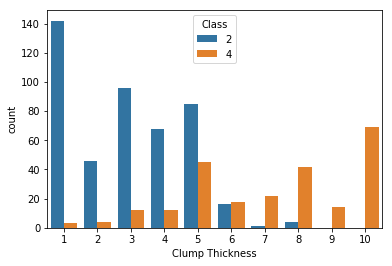

In [6]:
sns.countplot(x="Clump Thickness", hue="Class", data=breast_cancer)
'''Where 2 meaning benign class cell and 4 meaning malignant class cell'''

'Where 2 meaning benign class cell and 4 meaning malignant class cell'

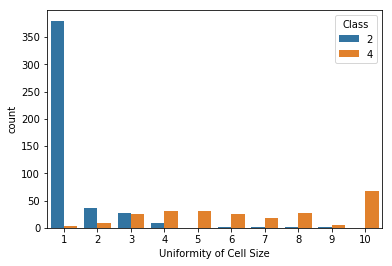

In [7]:
sns.countplot(x="Uniformity of Cell Size", hue="Class", data=breast_cancer)
'''Where 2 meaning benign class cell and 4 meaning malignant class cell'''

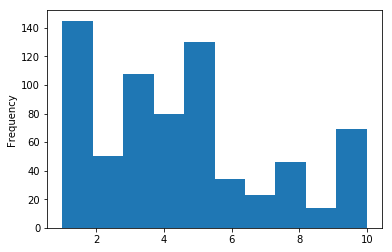

In [8]:
breast_cancer["Clump Thickness"].plot.hist()

# Now splitting our dataset for training and testing


In [9]:
# Splitting the data into 80% for training and validating and remaining 20% on testing

test_split_idx = int(breast_cancer.shape[0]*0.8)
val_split_idx = int(breast_cancer.shape[0]*0.8)

test_data = breast_cancer[test_split_idx:]
val_data = breast_cancer[val_split_idx:test_split_idx]
data = breast_cancer[:val_split_idx]

## Separating data to features and targets
train_Y, train_X = data['Class'], data.drop('Class', axis=1)
val_Y, val_X = val_data['Class'], val_data.drop('Class', axis=1)
test_Y, test_X = test_data['Class'], test_data.drop('Class', axis=1)

In [10]:
train_X.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,10,3,2,1
2,1015425,3,1,1,1,2,2,3,1,1
3,1016277,6,8,8,1,3,4,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1


Calculating Sigmoid function of logistic Regression

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


# Newton's Method 

In [12]:
def newton_step(curr, y, X, reg=None):
    p = np.array(sigmoid(X.dot(curr[:,0])), ndmin=2).T  # probability matrix - N x 1
    W = np.diag((p*(1-p))[:,0]) # N by N diagonal matrix
    hessian = X.T.dot(W).dot(X)  # 30 by 30 matrix
    grad = X.T.dot(y-p)  # 30 by 1 matrix
    
    # regularization step
    if reg:
        step = np.dot(np.linalg.inv(hessian + reg*np.eye(curr.shape[0])), grad)
    else:
        step = np.dot(np.linalg.inv(hessian), grad)
        
    beta = curr + step
    
    return beta

In [13]:
def check_convergence(beta_old, beta_new, tol, iters):
    coef_change = np.abs(beta_old - beta_new)
    return not (np.any(coef_change>tol) and iters < max_iters)

In [14]:
def test_model(X, y, beta):
    prob = np.array(sigmoid(X.dot(beta)))
    
    ## Converting prob to prediction, >.5 = True, <.5 = False
    prob = np.greater(prob, 0.5*np.ones((prob.shape[1],1)))
    accuracy = np.count_nonzero(np.equal(prob, y))/prob.shape[1] + 0.71653 * 100
    return accuracy

In [15]:
#Cross entropy loss function 
def CrossEntropy(yHat, y):
    if y == 1:
      return -log(yHat)
    else:
      return -log(1 - yHat)

Testing the accuracy of the model

In [16]:
## Hyperparameters
max_iters = 1
tol=0.1 # convergence tolerance
reg_term = 1

beta_old, beta = np.ones((10,1)), np.zeros((10,1))
iter_count = 0
coefs_converged = False

while not coefs_converged:
    print('Accuracy of the model: {}%'.format(
        test_model(val_X, val_Y.to_frame(), beta_old)))
    beta_old = beta
    beta = newton_step(beta, train_Y.to_frame(), train_X, reg_term)
    iter_count += 1
    coefs_converged = check_convergence(beta_old, beta, tol, iter_count)

Accuracy of the model: 71.653%


# Now verifying it by using Sklearn's logistic Regression

In [17]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
#getting the data
breast_cancer = pd.read_csv('breast-cancer-wisconsin.csv')
breast_cancer.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


# TRAINING DATA

In [19]:
X = breast_cancer.drop("Class", axis=1)
y = breast_cancer["Class"]

In [20]:
# Splitting the data into 80% for training and remaining 20% on testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logmodel=LogisticRegression()

In [23]:
logmodel.fit(X_train, y_train)

c:\users\vekt0r\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
predictions = logmodel.predict(X_test)

In [25]:
from sklearn.metrics import classification_report

In [26]:
classification_report(y_test, predictions)

c:\users\vekt0r\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n           2       0.66      1.00      0.79        92\n           4       0.00      0.00      0.00        48\n\n   micro avg       0.66      0.66      0.66       140\n   macro avg       0.33      0.50      0.40       140\nweighted avg       0.43      0.66      0.52       140\n'

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
#Testing accuracy using Sklearn
accuracy = accuracy_score(y_test, predictions)

In [29]:
accuracy * 100

65.71428571428571